In [ ]:
'''
KMeans Algorithm for Clustering
Goal: Cluster different user groups according based on their salaries and spending patterns
'''

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# read the dataset
dataset = pd.read_csv('Customers.csv')

In [21]:
# create axes
X = dataset.iloc[:, [3,4]].values
X.shape

(200, 2)

In [22]:
# using the elbow method to find the optimal number of clusters: https://bl.ocks.org/rpgove/0060ff3b656618e9136b
from sklearn.cluster import KMeans


In [23]:
# wcss = Within Cluster Sum of Squares - We need to find how many clusters we are going to create
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

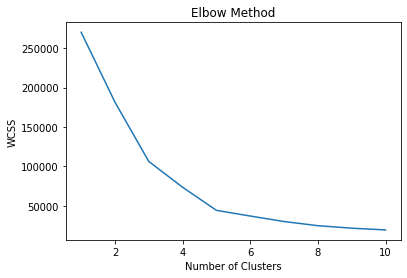

In [24]:
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(range(1, 11), wcss)
plt.show()

In [25]:
# In above graph, a good value for the number of clusters is 5
# So we run KMeans again with 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

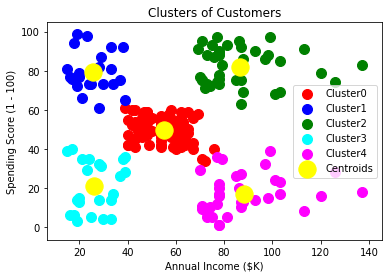

In [26]:
# visualize the clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(0, 5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colors[i], label = 'Cluster' + str(i))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($K)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()